<a href="https://colab.research.google.com/github/Thamires-Lopes/Projeto-modelos-em-redes/blob/main/Projeto_An%C3%A1lise_de_m%C3%A9todos_de_detec%C3%A7%C3%A3o_de_comunidades_em_redes_complexas_Thamires_Lopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import greedy_modularity_communities
from google.colab import drive

# Funções auxiliares

In [2]:
# Função utilizada para encontrar os vizinhos dos nós de um grafo e retorna essa informação na forma de dicionário
def pegar_vizinhos(grafo):
  vizinhos = {}
  for n in grafo:
    vizinhos[n] = list(grafo.neighbors(n))
  
  return vizinhos
  

In [3]:
# Função para criar um grafo a partir dos grupos de nós (comunidades) e dos vizinhos do grafo original
def criarGrafo(vizinhos, grupo_de_nos):
  novos_grafos = []

  for x in range(len(grupo_de_nos)):
    grupo = grupo_de_nos[x]
    novo_grafo = nx.Graph()
    for no in grupo:
      lista_de_vizinhos_no = vizinhos[no]
      for v in lista_de_vizinhos_no:
        if (v in grupo):
          novo_grafo.add_edge(no, v)
    novos_grafos.append(novo_grafo)

  return novos_grafos


In [4]:
# Função para criar grafo da maior componente de uma rede
def criarGrafoDaMaiorComponente(vizinhos, maiorComponente):
  novo_grafo = nx.Graph()
  for no in maiorComponente:
    lista_de_vizinhos_no = vizinhos[no]
    for v in lista_de_vizinhos_no:
      if (v in maiorComponente):
        novo_grafo.add_edge(no, v)
  
  return novo_grafo

# Primeira rede - Grafo karate

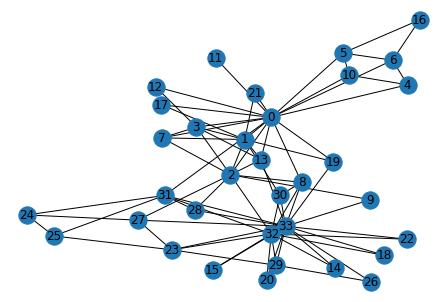

In [5]:
np.random.seed(0)
grafo_karate = nx.karate_club_graph()
nx.draw(grafo_karate, with_labels=True)

### Informações gerais

Número de nós do grafo: 34
Número de enlaces do grafo: 78
Densidade do grafo: 0.13903743315508021
Sequência do grau: [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
Grau médio: 4.588235294117647
Grau máximo: 17
CC = 0.5706384782076823
Tamanho médio dos caminhos do grafo: 2.408199643493761


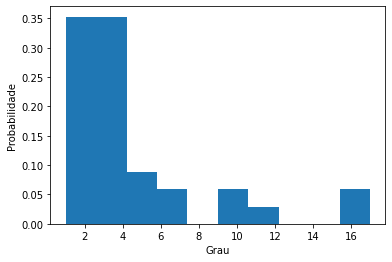

In [6]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(grafo_karate.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(grafo_karate.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(grafo_karate)))

# Sequência do grau
deg = [d for n, d in nx.degree(grafo_karate)]
print("Sequência do grau: "+ str(deg))

# Grau médio
lambd = np.average(deg, 0)
print("Grau médio: " + str(lambd))

# Grau máximo
print("Grau máximo: " + str(np.max(deg)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(grafo_karate)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(grafo_karate)))

# Histograma
plt.hist(deg, weights= np.ones_like(deg) / len(deg))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

### Girvan Newman

#### Identificando comunidades

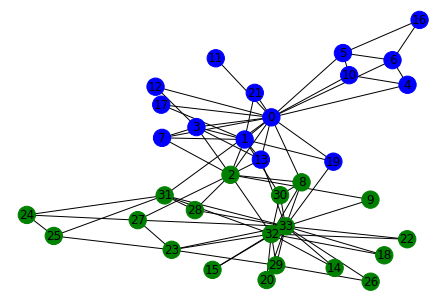

In [7]:
np.random.seed(0)
comunidades_grafo_karate = girvan_newman(grafo_karate)
grupos_de_nos_karate = []
for com in next(comunidades_grafo_karate):
  grupos_de_nos_karate.append(list(com))

cores = []
for no in grafo_karate:
    if no in grupos_de_nos_karate[0]:
        cores.append('blue')
    else: 
        cores.append('green')  
nx.draw(grafo_karate, node_color=cores, with_labels=True)
plt.show()

In [8]:
print("O número de comunidades encontradas é: " + str(len(grupos_de_nos_karate)))

O número de comunidades encontradas é: 2


#### Separando as comunidades

In [9]:
vizinhos_karate = pegar_vizinhos(grafo_karate)
lista_de_grafos_karate = criarGrafo(vizinhos_karate, grupos_de_nos_karate)
comunidade_karate_1 = lista_de_grafos_karate[0]
comunidade_karate_2 = lista_de_grafos_karate[1]

##### Primeira comunidade

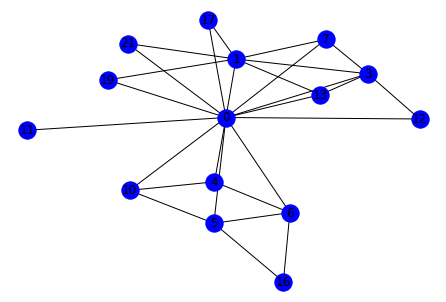

In [10]:
np.random.seed(0)
nx.draw(comunidade_karate_1, with_labels=True, node_color="blue")

Número de nós do grafo: 15
Número de enlaces do grafo: 28
Densidade do grafo: 0.26666666666666666
Sequência do grau: [13, 7, 5, 3, 4, 4, 3, 3, 1, 2, 3, 2, 2, 2, 2]
Grau médio: 3.7333333333333334
Grau máximo: 13
CC = 0.6987301587301588
Tamanho médio dos caminhos do grafo: 1.819047619047619


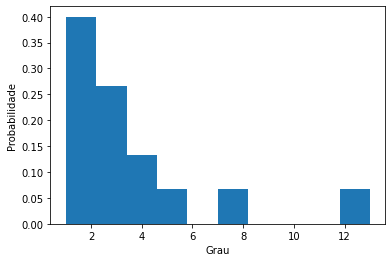

In [11]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_karate_1.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_karate_1.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_karate_1)))

# Sequência do grau
deg_karate_1 = [d for n, d in nx.degree(comunidade_karate_1)]
print("Sequência do grau: "+ str(deg_karate_1))

# Grau médio
lambd_karate_1 = np.average(deg_karate_1, 0)
print("Grau médio: " + str(lambd_karate_1))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_karate_1)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_karate_1)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_karate_1)))

# Histograma
plt.hist(deg_karate_1, weights= np.ones_like(deg_karate_1) / len(deg_karate_1))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Segunda comunidade

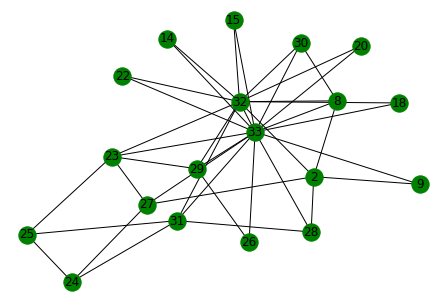

In [12]:
np.random.seed(0)
nx.draw(comunidade_karate_2, with_labels=True, node_color="green")

Número de nós do grafo: 19
Número de enlaces do grafo: 40
Densidade do grafo: 0.23391812865497075
Sequência do grau: [5, 4, 2, 4, 3, 12, 3, 15, 2, 2, 2, 2, 2, 5, 3, 4, 3, 5, 2]
Grau médio: 4.2105263157894735
Grau máximo: 15
CC = 0.5599908863066759
Tamanho médio dos caminhos do grafo: 1.8888888888888888


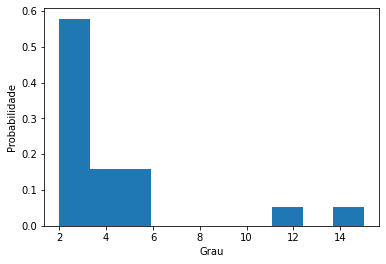

In [13]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_karate_2.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_karate_2.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_karate_2)))

# Sequência do grau
deg_karate_2 = [d for n, d in nx.degree(comunidade_karate_2)]
print("Sequência do grau: "+ str(deg_karate_2))

# Grau médio
lambd_karate_2 = np.average(deg_karate_2, 0)
print("Grau médio: " + str(lambd_karate_2))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_karate_2)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_karate_2)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_karate_2)))

# Histograma
plt.hist(deg_karate_2, weights= np.ones_like(deg_karate_2) / len(deg_karate_2))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

### Greedy modularity

#### Identificando comunidades

In [14]:
karate_greedy_comunidades = list(greedy_modularity_communities(grafo_karate))

In [15]:
grupo_de_nos_karate_greedy = []
for c in karate_greedy_comunidades:
  grupo_de_nos_karate_greedy.append(list(c))

In [16]:
print("O número de comunidades encontradas é: " + str(len(grupo_de_nos_karate_greedy)))

O número de comunidades encontradas é: 3


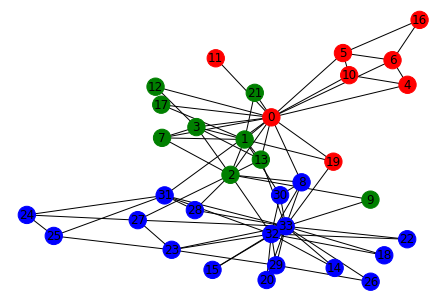

In [17]:
np.random.seed(0)
cores = []
for no in grafo_karate:
    if no in grupo_de_nos_karate_greedy[0]:
      cores.append('blue')
    elif no in grupo_de_nos_karate_greedy[1]: 
      cores.append('green')
    else:
      cores.append('red')  
nx.draw(grafo_karate, node_color=cores, with_labels=True)
plt.show()

#### Separando as comunidades

In [18]:
vizinhos_karate_greedy = pegar_vizinhos(grafo_karate)
lista_de_grafos_karate_greedy = criarGrafo(vizinhos_karate_greedy, grupo_de_nos_karate_greedy)
comunidade_karate_greedy_1 = lista_de_grafos_karate_greedy[0]
comunidade_karate_greedy_2 = lista_de_grafos_karate_greedy[1]
comunidade_karate_greedy_3 = lista_de_grafos_karate_greedy[2]

##### Primeira comunidade

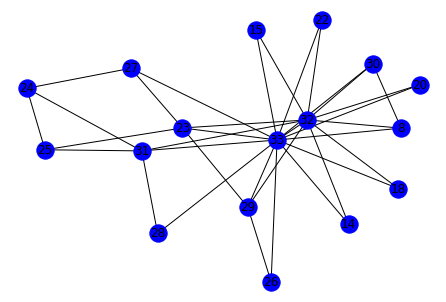

In [19]:
np.random.seed(0)
nx.draw(comunidade_karate_greedy_1, with_labels=True, node_color="blue")

Número de nós do grafo: 17
Número de enlaces do grafo: 34
Densidade do grafo: 0.25
Sequência do grau: [11, 3, 2, 2, 2, 2, 2, 5, 4, 3, 5, 14, 2, 3, 2, 3, 3]
Grau médio: 4.0
Grau máximo: 14
CC = 0.6911578617460972
Tamanho médio dos caminhos do grafo: 1.875


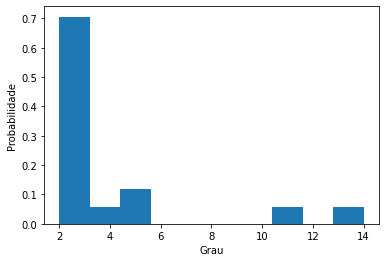

In [20]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_karate_greedy_1.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_karate_greedy_1.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_karate_greedy_1)))

# Sequência do grau
deg_karate_greedy_1 = [d for n, d in nx.degree(comunidade_karate_greedy_1)]
print("Sequência do grau: "+ str(deg_karate_greedy_1))

# Grau médio
lambd_karate_greedy_1 = np.average(deg_karate_greedy_1, 0)
print("Grau médio: " + str(lambd_karate_greedy_1))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_karate_greedy_1)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_karate_greedy_1)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_karate_greedy_1)))

# Histograma
plt.hist(deg_karate_greedy_1, weights= np.ones_like(deg_karate_greedy_1) / len(deg_karate_greedy_1))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Segunda comunidade

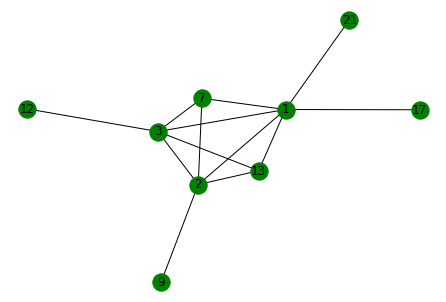

In [21]:
np.random.seed(0)
nx.draw(comunidade_karate_greedy_2, with_labels=True, node_color="green")

Número de nós do grafo: 9
Número de enlaces do grafo: 13
Densidade do grafo: 0.3611111111111111
Sequência do grau: [6, 5, 5, 3, 3, 1, 1, 1, 1]
Grau médio: 2.888888888888889
Grau máximo: 6
CC = 0.37037037037037035
Tamanho médio dos caminhos do grafo: 1.7777777777777777


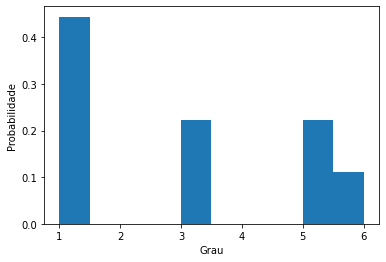

In [22]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_karate_greedy_2.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_karate_greedy_2.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_karate_greedy_2)))

# Sequência do grau
deg_karate_greedy_2 = [d for n, d in nx.degree(comunidade_karate_greedy_2)]
print("Sequência do grau: "+ str(deg_karate_greedy_2))

# Grau médio
lambd_karate_greedy_2 = np.average(deg_karate_greedy_2, 0)
print("Grau médio: " + str(lambd_karate_greedy_2))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_karate_greedy_2)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_karate_greedy_2)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_karate_greedy_2)))

# Histograma
plt.hist(deg_karate_greedy_2, weights= np.ones_like(deg_karate_greedy_2) / len(deg_karate_greedy_2))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Terceira comunidade

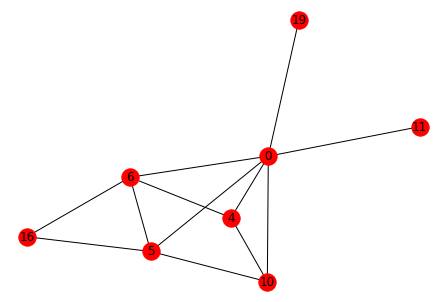

In [23]:
np.random.seed(0)
nx.draw(comunidade_karate_greedy_3, with_labels=True, node_color="red")

Número de nós do grafo: 8
Número de enlaces do grafo: 12
Densidade do grafo: 0.42857142857142855
Sequência do grau: [6, 3, 4, 4, 3, 1, 1, 2]
Grau médio: 3.0
Grau máximo: 6
CC = 0.45
Tamanho médio dos caminhos do grafo: 1.6428571428571428


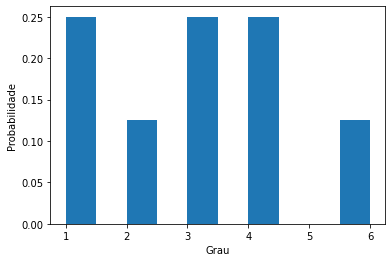

In [24]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_karate_greedy_3.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_karate_greedy_3.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_karate_greedy_3)))

# Sequência do grau
deg_karate_greedy_3 = [d for n, d in nx.degree(comunidade_karate_greedy_3)]
print("Sequência do grau: "+ str(deg_karate_greedy_3))

# Grau médio
lambd_karate_greedy_3 = np.average(deg_karate_greedy_3, 0)
print("Grau médio: " + str(lambd_karate_greedy_3))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_karate_greedy_3)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_karate_greedy_3)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_karate_greedy_3)))

# Histograma
plt.hist(deg_karate_greedy_3, weights= np.ones_like(deg_karate_greedy_3) / len(deg_karate_greedy_3))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

# Segunda rede - Grafo email

In [25]:
drive.mount('/content/drive')
email = nx.read_edgelist("/content/drive/My Drive/colabFiles/Modelagem de redes/email-Eu-core.txt")
# Link https://snap.stanford.edu/data/email-Eu-core.html

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Mostrando o grafo

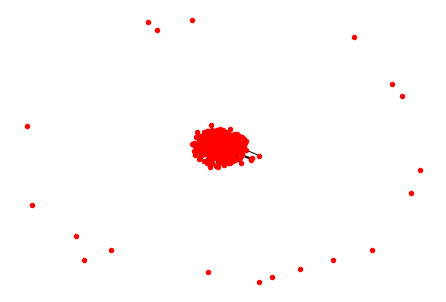

In [26]:
np.random.seed(0)
nx.draw(email, node_size=20, with_labels=False, node_color="red")

### Lidando com a maior componente

In [27]:
nx.is_connected(email)

False

In [28]:
# Quantidade de componentes no grafo
lista_de_componentes_em_ordem_email = [len(c) for c in sorted(nx.connected_components(email), key=len, reverse=True)]
print("Quantidade de componentes: " + str(len(lista_de_componentes_em_ordem_email)))

# Tamanho da maior componente conectada
maior_componente_email = max(nx.connected_components(email), key=len)
print("Tamanho da maior componente conectada: " + str(len(maior_componente_email)))

Quantidade de componentes: 20
Tamanho da maior componente conectada: 986


In [29]:
vizinhos_email = pegar_vizinhos(email)
grafo_maior_componente_email = criarGrafoDaMaiorComponente(vizinhos_email, maior_componente_email)

#### Informações gerais

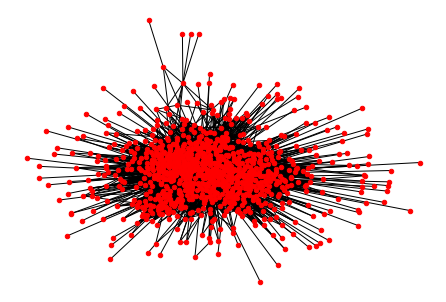

In [30]:
nx.draw(grafo_maior_componente_email, node_size=20, with_labels=False, node_color="red")

Número de nós do grafo: 986
Número de enlaces do grafo: 16687
Densidade do grafo: 0.034363319982290134
Sequência do grau: [76, 47, 19, 30, 85, 38, 70, 43, 30, 34, 17, 74, 52, 83, 15, 66, 25, 24, 39, 45, 16, 30, 48, 37, 21, 138, 53, 170, 28, 72, 22, 31, 44, 108, 45, 154, 22, 86, 33, 37, 17, 10, 25, 15, 55, 29, 22, 185, 44, 164, 58, 26, 54, 39, 42, 33, 106, 142, 171, 73, 146, 55, 63, 25, 12, 15, 30, 26, 26, 72, 41, 138, 173, 76, 92, 15, 29, 25, 22, 44, 25, 36, 84, 41, 29, 20, 29, 5, 43, 88, 21, 146, 14, 13, 168, 20, 40, 6, 40, 5, 21, 14, 38, 12, 113, 97, 10, 11, 21, 18, 18, 86, 63, 77, 69, 87, 51, 51, 24, 71, 177, 29, 74, 132, 43, 30, 98, 64, 33, 59, 87, 135, 24, 142, 41, 61, 65, 63, 53, 64, 37, 55, 93, 61, 31, 24, 38, 41, 218, 27, 28, 27, 15, 14, 56, 115, 106, 5, 1, 23, 95, 23, 37, 62, 17, 16, 49, 15, 13, 51, 45, 42, 14, 25, 131, 86, 53, 4, 103, 8, 48, 91, 180, 57, 35, 30, 36, 70, 61, 68, 62, 139, 31, 55, 46, 53, 74, 130, 44, 51, 27, 122, 42, 37, 78, 37, 36, 28, 71, 91, 27, 28, 39, 30, 

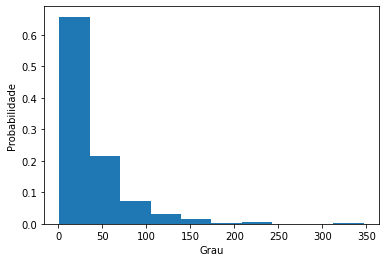

In [31]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(grafo_maior_componente_email.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(grafo_maior_componente_email.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(grafo_maior_componente_email)))

# Sequência do grau
deg_email = [d for n, d in nx.degree(grafo_maior_componente_email)]
print("Sequência do grau: "+ str(deg_email))

# Grau médio
lambd_email = np.average(deg_email, 0)
print("Grau médio: " + str(lambd_email))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_email)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(grafo_maior_componente_email)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(grafo_maior_componente_email)))

# Histograma
plt.hist(deg_email, weights= np.ones_like(deg_email) / len(deg_email))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

### Girvan Newman

#### Identificando comunidades

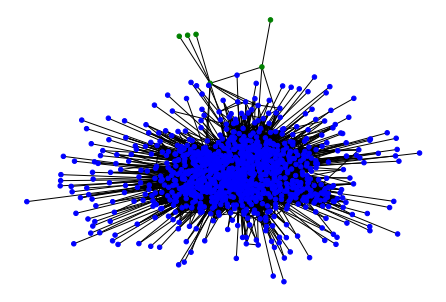

In [32]:
np.random.seed(0)
comunidades_grafo_email = girvan_newman(grafo_maior_componente_email)
grupos_de_nos_email = []
for com in next(comunidades_grafo_email):
  grupos_de_nos_email.append(list(com))

cores = []
for no in grafo_maior_componente_email:
    if no in grupos_de_nos_email[0]:
        cores.append('blue')
    else: 
        cores.append('green')  
nx.draw(grafo_maior_componente_email, node_size=20, node_color=cores, with_labels=False)
plt.show()

In [33]:
print("O número de comunidades encontradas é: " + str(len(grupos_de_nos_email)))

O número de comunidades encontradas é: 2


#### Separando as comunidades

In [34]:
vizinhos_maior_componente_email = pegar_vizinhos(grafo_maior_componente_email)
lista_de_grafos_email = criarGrafo(vizinhos_maior_componente_email, grupos_de_nos_email)
comunidade_email_1 = lista_de_grafos_email[0]
comunidade_email_2 = lista_de_grafos_email[1]

##### Primeira comunidade

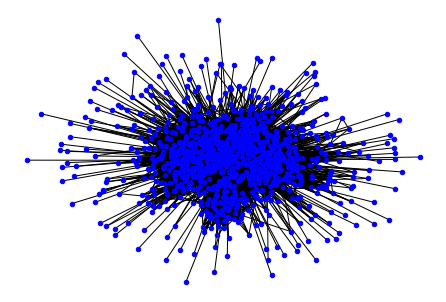

In [35]:
np.random.seed(0)
nx.draw(comunidade_email_1, node_size=20, with_labels=False, node_color="blue")

Número de nós do grafo: 980
Número de enlaces do grafo: 16672
Densidade do grafo: 0.03475433074148965
Sequência do grau: [76, 47, 19, 30, 85, 38, 70, 43, 30, 34, 17, 74, 52, 83, 15, 66, 25, 24, 39, 45, 16, 30, 48, 37, 21, 138, 53, 170, 28, 72, 22, 31, 44, 108, 45, 154, 22, 86, 33, 37, 17, 10, 25, 15, 55, 29, 22, 185, 44, 164, 58, 26, 54, 39, 42, 33, 106, 142, 171, 73, 146, 55, 63, 25, 12, 15, 30, 26, 26, 72, 41, 138, 173, 76, 92, 15, 29, 25, 22, 44, 25, 36, 84, 41, 29, 20, 29, 5, 43, 88, 21, 146, 14, 13, 168, 20, 40, 6, 40, 5, 21, 14, 38, 12, 113, 97, 10, 11, 21, 18, 18, 86, 63, 77, 69, 87, 51, 51, 24, 71, 177, 29, 74, 132, 43, 30, 98, 64, 33, 59, 87, 135, 24, 142, 41, 61, 65, 63, 53, 64, 37, 54, 93, 61, 31, 24, 38, 41, 218, 27, 28, 27, 15, 14, 56, 115, 106, 5, 1, 23, 95, 23, 37, 62, 17, 16, 49, 15, 13, 51, 45, 42, 14, 25, 131, 86, 53, 4, 103, 8, 48, 91, 180, 57, 35, 30, 36, 70, 61, 68, 62, 139, 31, 55, 46, 53, 74, 130, 44, 51, 27, 122, 42, 37, 78, 37, 36, 28, 71, 91, 27, 28, 39, 30, 6

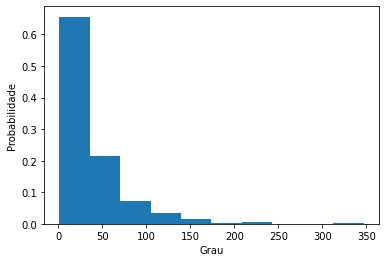

In [36]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_email_1.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_email_1.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_email_1)))

# Sequência do grau
deg_email_1 = [d for n, d in nx.degree(comunidade_email_1)]
print("Sequência do grau: "+ str(deg_email_1))

# Grau médio
lambd_email_1 = np.average(deg_email_1, 0)
print("Grau médio: " + str(lambd_email_1))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_email_1)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_email_1)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_email_1)))

# Histograma
plt.hist(deg_email_1, weights= np.ones_like(deg_email_1) / len(deg_email_1))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Segunda comunidade

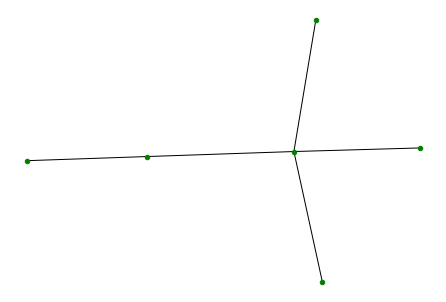

In [37]:
np.random.seed(0)
nx.draw(comunidade_email_2, node_size=20, with_labels=False, node_color="green")

Número de nós do grafo: 6
Número de enlaces do grafo: 7
Densidade do grafo: 0.4666666666666667
Sequência do grau: [1, 6, 3, 2, 1, 1]
Grau médio: 2.3333333333333335
Grau máximo: 6
CC = 0.0
Tamanho médio dos caminhos do grafo: 1.8666666666666667


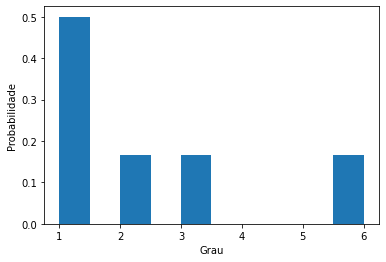

In [38]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_email_2.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_email_2.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_email_2)))

# Sequência do grau
deg_email_2 = [d for n, d in nx.degree(comunidade_email_2)]
print("Sequência do grau: "+ str(deg_email_2))

# Grau médio
lambd_email_2 = np.average(deg_email_2, 0)
print("Grau médio: " + str(lambd_email_2))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_email_2)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_email_2)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_email_2)))

# Histograma
plt.hist(deg_email_2, weights= np.ones_like(deg_email_2) / len(deg_email_2))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

### Greedy modularity

#### Identificando comunidades

In [39]:
email_greedy_comunidades = list(greedy_modularity_communities(grafo_maior_componente_email))

In [40]:
grupo_de_nos_email_greedy = []
for c in email_greedy_comunidades:
  grupo_de_nos_email_greedy.append(list(c))

In [41]:
print("O número de comunidades encontradas é: " + str(len(grupo_de_nos_email_greedy)))


O número de comunidades encontradas é: 28


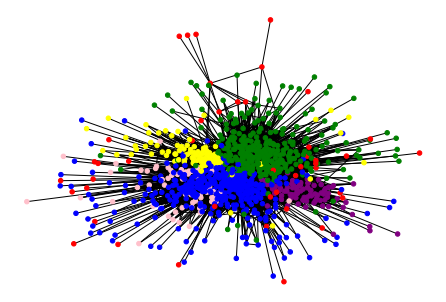

In [42]:
np.random.seed(0)
cores = []
for no in grafo_maior_componente_email:
    if no in grupo_de_nos_email_greedy[0]:
      cores.append('blue')
    elif no in grupo_de_nos_email_greedy[1]: 
      cores.append('green')
    elif no in grupo_de_nos_email_greedy[2]:
      cores.append('yellow')
    elif no in grupo_de_nos_email_greedy[3]:
      cores.append('purple')
    elif no in grupo_de_nos_email_greedy[4]:
      cores.append('pink')
    else:
      cores.append('red')  
nx.draw(grafo_maior_componente_email, node_size = 20, node_color=cores, with_labels=False)
plt.show()

#### Separando as comunidades

In [43]:
vizinhos_maior_componente_email_greedy = pegar_vizinhos(grafo_maior_componente_email)
lista_de_grafos_email_greedy = criarGrafo(vizinhos_maior_componente_email_greedy, grupo_de_nos_email_greedy)
comunidade_email_greedy_1 = lista_de_grafos_email_greedy[0]
comunidade_email_greedy_2 = lista_de_grafos_email_greedy[1]
comunidade_email_greedy_3 = lista_de_grafos_email_greedy[2]
comunidade_email_greedy_4 = lista_de_grafos_email_greedy[3]
comunidade_email_greedy_5 = lista_de_grafos_email_greedy[4]

##### Primeira comunidade

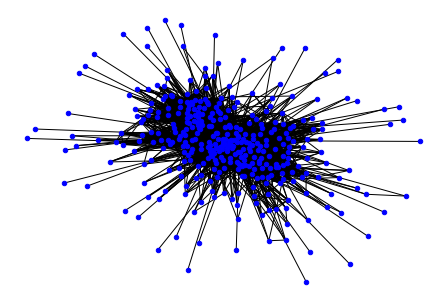

In [44]:
np.random.seed(0)
nx.draw(comunidade_email_greedy_1, node_size=20, with_labels=False, node_color="blue")

Número de nós do grafo: 369
Número de enlaces do grafo: 5257
Densidade do grafo: 0.07742724166372099
Sequência do grau: [14, 15, 46, 30, 13, 13, 43, 31, 39, 13, 20, 73, 46, 4, 83, 7, 60, 13, 102, 95, 87, 134, 96, 44, 37, 67, 56, 99, 23, 94, 19, 109, 45, 103, 44, 64, 48, 79, 23, 52, 6, 72, 56, 47, 55, 42, 69, 8, 73, 67, 30, 45, 81, 93, 30, 88, 35, 25, 40, 74, 20, 10, 25, 64, 39, 88, 87, 90, 56, 1, 31, 56, 42, 5, 11, 13, 25, 47, 66, 45, 32, 54, 73, 19, 36, 7, 26, 105, 39, 70, 29, 15, 37, 65, 55, 16, 30, 22, 8, 47, 50, 47, 55, 48, 23, 42, 4, 33, 3, 6, 19, 18, 22, 89, 17, 21, 72, 16, 7, 44, 51, 26, 41, 33, 35, 33, 18, 116, 49, 40, 19, 24, 41, 62, 132, 59, 113, 60, 39, 6, 13, 7, 34, 53, 40, 73, 78, 17, 68, 11, 26, 28, 31, 40, 4, 4, 77, 26, 25, 18, 25, 64, 52, 15, 50, 61, 66, 62, 9, 13, 41, 16, 16, 22, 50, 30, 33, 10, 27, 38, 14, 29, 28, 61, 69, 45, 65, 46, 12, 23, 15, 53, 19, 48, 38, 10, 8, 32, 44, 13, 17, 2, 39, 31, 70, 13, 14, 9, 4, 1, 20, 28, 21, 21, 19, 10, 56, 22, 23, 20, 4, 16, 52, 33

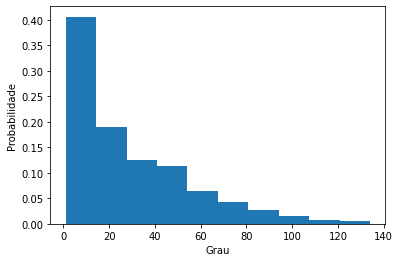

In [45]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_email_greedy_1.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_email_greedy_1.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_email_greedy_1)))

# Sequência do grau
deg_email_greedy_1 = [d for n, d in nx.degree(comunidade_email_greedy_1)]
print("Sequência do grau: "+ str(deg_email_greedy_1))

# Grau médio
lambd_email_greedy_1 = np.average(deg_email_greedy_1, 0)
print("Grau médio: " + str(lambd_email_greedy_1))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_email_greedy_1)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_email_greedy_1)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_email_greedy_1)))

# Histograma
plt.hist(deg_email_greedy_1, weights= np.ones_like(deg_email_greedy_1) / len(deg_email_greedy_1))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Segunda comunidade

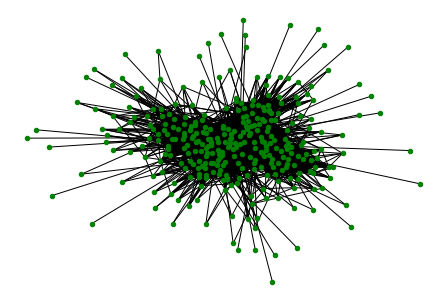

In [46]:
np.random.seed(0)
nx.draw(comunidade_email_greedy_2, node_size=20, with_labels=False, node_color="green")

Número de nós do grafo: 323
Número de enlaces do grafo: 3823
Densidade do grafo: 0.0735149895198354
Sequência do grau: [17, 59, 17, 58, 54, 59, 61, 44, 45, 41, 36, 88, 23, 48, 66, 20, 56, 29, 46, 51, 55, 47, 67, 30, 26, 33, 78, 64, 56, 55, 43, 123, 26, 53, 39, 44, 68, 69, 42, 26, 26, 81, 37, 32, 30, 35, 16, 25, 54, 71, 25, 28, 32, 29, 57, 2, 42, 64, 30, 59, 34, 65, 34, 17, 28, 36, 18, 12, 34, 33, 14, 16, 20, 17, 35, 45, 43, 67, 12, 25, 65, 39, 27, 19, 51, 88, 6, 11, 12, 12, 125, 37, 15, 21, 3, 50, 72, 23, 27, 19, 24, 35, 40, 35, 22, 15, 21, 45, 17, 1, 24, 3, 13, 5, 16, 5, 11, 14, 1, 46, 43, 47, 14, 41, 34, 39, 50, 44, 20, 48, 32, 34, 20, 47, 34, 37, 26, 47, 13, 59, 24, 32, 27, 31, 14, 38, 30, 35, 23, 6, 41, 12, 48, 1, 54, 45, 18, 17, 42, 54, 21, 10, 40, 39, 35, 12, 23, 34, 55, 16, 15, 12, 47, 19, 40, 20, 34, 30, 30, 20, 6, 20, 20, 18, 37, 36, 25, 14, 8, 9, 10, 14, 16, 31, 31, 3, 14, 14, 6, 19, 9, 6, 5, 27, 11, 7, 28, 15, 23, 27, 19, 22, 19, 23, 14, 11, 23, 25, 12, 10, 6, 9, 19, 24, 2, 

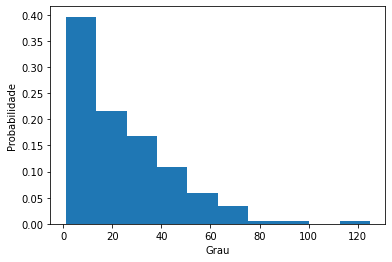

In [47]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_email_greedy_2.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_email_greedy_2.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_email_greedy_2)))

# Sequência do grau
deg_email_greedy_2 = [d for n, d in nx.degree(comunidade_email_greedy_2)]
print("Sequência do grau: "+ str(deg_email_greedy_2))

# Grau médio
lambd_email_greedy_2 = np.average(deg_email_greedy_2, 0)
print("Grau médio: " + str(lambd_email_greedy_2))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_email_greedy_2)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_email_greedy_2)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_email_greedy_2)))

# Histograma
plt.hist(deg_email_greedy_2, weights= np.ones_like(deg_email_greedy_2) / len(deg_email_greedy_2))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Terceira comunidade

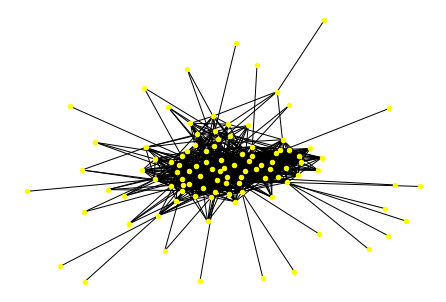

In [48]:
np.random.seed(0)
nx.draw(comunidade_email_greedy_3, node_size=20, with_labels=False, node_color="yellow")

Número de nós do grafo: 103
Número de enlaces do grafo: 984
Densidade do grafo: 0.18732153055396916
Sequência do grau: [2, 18, 27, 38, 18, 35, 15, 30, 43, 31, 27, 24, 40, 31, 24, 25, 21, 19, 46, 27, 23, 14, 21, 45, 43, 33, 24, 54, 29, 13, 50, 31, 13, 27, 32, 29, 25, 34, 11, 31, 20, 1, 1, 10, 23, 30, 27, 42, 23, 41, 27, 38, 10, 25, 16, 38, 43, 38, 1, 26, 1, 18, 1, 19, 10, 16, 18, 3, 7, 1, 10, 16, 15, 2, 16, 4, 33, 22, 17, 27, 15, 2, 7, 29, 4, 4, 6, 3, 11, 3, 3, 3, 1, 1, 1, 3, 1, 4, 2, 1, 1, 1, 3]
Grau médio: 19.106796116504853
Grau máximo: 54
CC = 0.504975945622249
Tamanho médio dos caminhos do grafo: 2.190938511326861


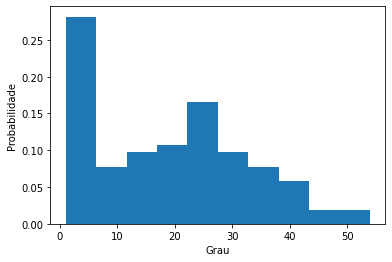

In [49]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_email_greedy_3.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_email_greedy_3.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_email_greedy_3)))

# Sequência do grau
deg_email_greedy_3 = [d for n, d in nx.degree(comunidade_email_greedy_3)]
print("Sequência do grau: "+ str(deg_email_greedy_3))

# Grau médio
lambd_email_greedy_3 = np.average(deg_email_greedy_3, 0)
print("Grau médio: " + str(lambd_email_greedy_3))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_email_greedy_3)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_email_greedy_3)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_email_greedy_3)))

# Histograma
plt.hist(deg_email_greedy_3, weights= np.ones_like(deg_email_greedy_3) / len(deg_email_greedy_3))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Quarta comunidade

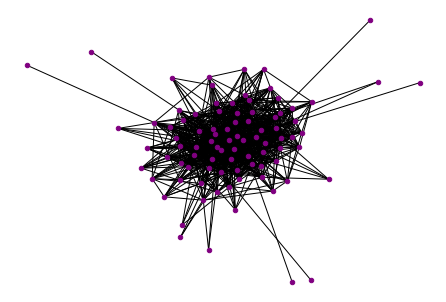

In [50]:
np.random.seed(0)
nx.draw(comunidade_email_greedy_4, node_size=20, with_labels=False, node_color="purple")

Número de nós do grafo: 89
Número de enlaces do grafo: 988
Densidade do grafo: 0.2522982635342186
Sequência do grau: [47, 14, 27, 24, 25, 26, 33, 26, 56, 24, 18, 35, 40, 13, 20, 42, 33, 18, 44, 23, 59, 21, 32, 20, 51, 26, 30, 17, 5, 24, 33, 36, 38, 25, 39, 53, 47, 38, 18, 10, 12, 27, 22, 18, 39, 36, 20, 14, 12, 20, 30, 2, 39, 1, 21, 11, 31, 11, 10, 11, 18, 11, 22, 11, 37, 19, 22, 18, 1, 10, 43, 20, 25, 17, 1, 1, 10, 5, 18, 16, 10, 10, 6, 14, 4, 3, 5, 1, 1]
Grau médio: 22.202247191011235
Grau máximo: 59
CC = 0.5138986577053218
Tamanho médio dos caminhos do grafo: 1.8730847803881512


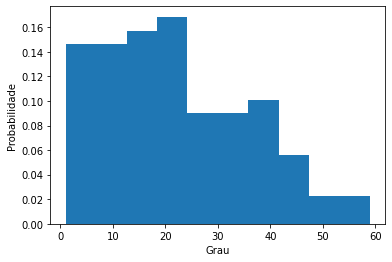

In [51]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_email_greedy_4.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_email_greedy_4.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_email_greedy_4)))

# Sequência do grau
deg_email_greedy_4 = [d for n, d in nx.degree(comunidade_email_greedy_4)]
print("Sequência do grau: "+ str(deg_email_greedy_4))

# Grau médio
lambd_email_greedy_4 = np.average(deg_email_greedy_4, 0)
print("Grau médio: " + str(lambd_email_greedy_4))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_email_greedy_4)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_email_greedy_4)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_email_greedy_4)))

# Histograma
plt.hist(deg_email_greedy_4, weights= np.ones_like(deg_email_greedy_4) / len(deg_email_greedy_4))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Quinta comunidade

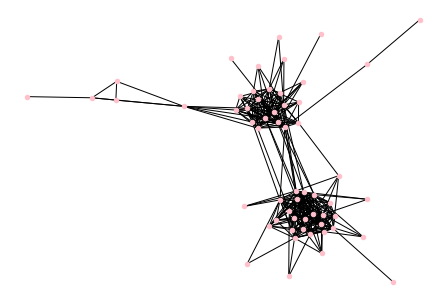

In [52]:
np.random.seed(0)
nx.draw(comunidade_email_greedy_5, node_size=20, with_labels=False, node_color="pink")

Número de nós do grafo: 58
Número de enlaces do grafo: 376
Densidade do grafo: 0.22746521476104054
Sequência do grau: [1, 20, 12, 14, 19, 17, 23, 16, 19, 23, 16, 12, 19, 4, 24, 22, 19, 12, 21, 26, 18, 23, 18, 20, 2, 24, 23, 23, 6, 28, 20, 18, 24, 3, 13, 7, 12, 5, 6, 5, 10, 1, 4, 16, 12, 5, 16, 1, 12, 10, 9, 2, 3, 5, 3, 1, 4, 1]
Grau médio: 12.96551724137931
Grau máximo: 28
CC = 0.701463974071869
Tamanho médio dos caminhos do grafo: 2.3914095583787054


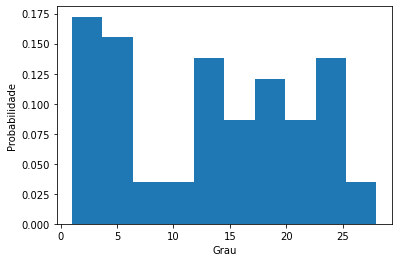

In [53]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_email_greedy_5.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_email_greedy_5.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_email_greedy_5)))

# Sequência do grau
deg_email_greedy_5 = [d for n, d in nx.degree(comunidade_email_greedy_5)]
print("Sequência do grau: "+ str(deg_email_greedy_5))

# Grau médio
lambd_email_greedy_5 = np.average(deg_email_greedy_5, 0)
print("Grau médio: " + str(lambd_email_greedy_5))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_email_greedy_5)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_email_greedy_5)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_email_greedy_5)))

# Histograma
plt.hist(deg_email_greedy_5, weights= np.ones_like(deg_email_greedy_5) / len(deg_email_greedy_5))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

# Terceira rede - Grafo mensagens

### Limpeza das informações usando pandas

In [54]:
df = pd.read_csv('/content/drive/My Drive/colabFiles/Modelagem de redes/CollegeMsg.txt', sep=" ",header=None)
# Link: https://snap.stanford.edu/data/CollegeMsg.html

In [55]:
df = df.drop([2], 1)

In [56]:
mensagens = nx.from_pandas_edgelist(df, source=0, target=1)

### Mostrando o grafo

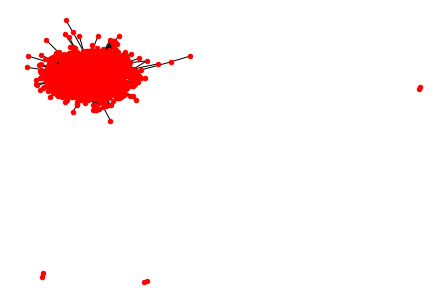

In [57]:
np.random.seed(0)
nx.draw(mensagens, node_size=20, with_labels=False, node_color="red")

### Lidando com a maior componente

In [58]:
nx.is_connected(mensagens)

False

In [59]:
# Quantidade de componentes no grafo
lista_de_componentes_em_ordem = [len(c) for c in sorted(nx.connected_components(mensagens), key=len, reverse=True)]
print("Quantidade de componentes: " + str(len(lista_de_componentes_em_ordem)))

# Tamanho da maior componente conectada
maior_componente = max(nx.connected_components(mensagens), key=len)
print("Tamanho da maior componente conectada: " + str(len(maior_componente)))

Quantidade de componentes: 4
Tamanho da maior componente conectada: 1893


In [60]:
vizinhos_mensagens = pegar_vizinhos(mensagens)
maior_componente_mensagens = criarGrafoDaMaiorComponente(vizinhos_mensagens, maior_componente)

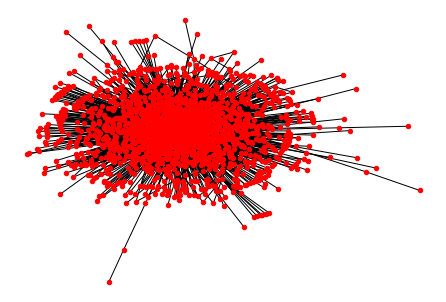

In [61]:
np.random.seed(0)
nx.draw(maior_componente_mensagens, node_size=20, with_labels=False, node_color="red")

#### Informações gerais

Número de nós do grafo: 1893
Número de enlaces do grafo: 13835
Densidade do grafo: 0.007725692408550921
Sequência do grau: [35, 5, 5, 20, 1, 16, 1, 10, 49, 30, 1, 160, 8, 56, 104, 18, 17, 177, 89, 7, 13, 73, 178, 22, 11, 6, 13, 43, 15, 1, 1, 14, 66, 31, 29, 207, 1, 227, 66, 1, 22, 21, 28, 15, 23, 53, 106, 34, 1, 40, 117, 6, 17, 16, 146, 77, 7, 46, 28, 55, 46, 60, 2, 63, 4, 69, 11, 121, 77, 38, 10, 23, 66, 71, 5, 8, 183, 40, 1, 55, 22, 9, 41, 45, 1, 5, 16, 227, 61, 6, 6, 28, 20, 23, 34, 2, 14, 34, 10, 3, 21, 8, 66, 6, 44, 88, 27, 110, 36, 41, 38, 22, 33, 25, 3, 2, 14, 93, 56, 67, 6, 12, 86, 10, 15, 21, 15, 17, 172, 23, 2, 18, 29, 35, 11, 5, 1, 117, 35, 36, 23, 20, 12, 6, 6, 13, 49, 9, 21, 15, 63, 5, 23, 99, 36, 48, 10, 13, 15, 20, 156, 91, 4, 6, 51, 15, 30, 39, 44, 3, 1, 15, 2, 1, 4, 10, 6, 18, 13, 12, 241, 19, 18, 62, 11, 19, 9, 42, 45, 18, 9, 8, 15, 45, 5, 15, 41, 53, 65, 5, 83, 5, 22, 21, 20, 31, 105, 31, 10, 29, 17, 52, 89, 22, 22, 23, 72, 53, 31, 35, 23, 8, 55, 37, 9, 7, 8, 4, 32, 

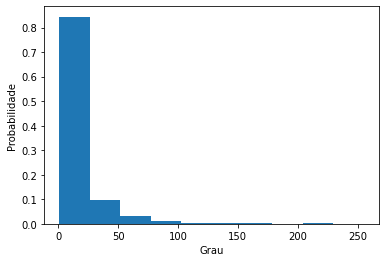

In [62]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(maior_componente_mensagens.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(maior_componente_mensagens.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(maior_componente_mensagens)))

# Sequência do grau
deg_mensagens = [d for n, d in nx.degree(maior_componente_mensagens)]
print("Sequência do grau: "+ str(deg_mensagens))

# Grau médio
lambd_mensagens = np.average(deg_mensagens, 0)
print("Grau médio: " + str(lambd_mensagens))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_mensagens)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(maior_componente_mensagens)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(maior_componente_mensagens)))

# Histograma
plt.hist(deg_mensagens, weights= np.ones_like(deg_mensagens) / len(deg_mensagens))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

### Girvan Newman

#### Identificando comunidades

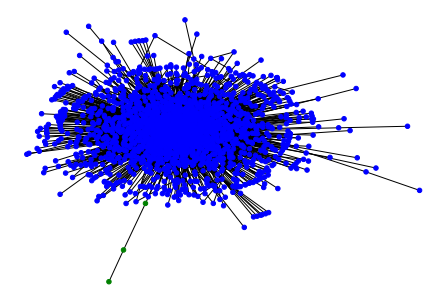

In [63]:
np.random.seed(0)
comunidades_grafo_mensagens = girvan_newman(maior_componente_mensagens)
grupos_de_nos_mensagens = []
for com in next(comunidades_grafo_mensagens):
  grupos_de_nos_mensagens.append(list(com))

cores = []
for no in maior_componente_mensagens:
    if no in grupos_de_nos_mensagens[0]:
        cores.append('blue')
    else: 
        cores.append('green')  
nx.draw(maior_componente_mensagens, node_size=20, node_color=cores, with_labels=False)
plt.show()

#### Separando as comunidades

In [64]:
print("O número de comunidades encontradas é: " + str(len(grupos_de_nos_mensagens)))

O número de comunidades encontradas é: 2


In [65]:
vizinhos_maior_componente_mensagens = pegar_vizinhos(maior_componente_mensagens)
lista_de_grafos_mensagens = criarGrafo(vizinhos_maior_componente_mensagens, grupos_de_nos_mensagens)
comunidade_mensagens_1 = lista_de_grafos_mensagens[0]
comunidade_mensagens_2 = lista_de_grafos_mensagens[1]

##### Primeira comunidade

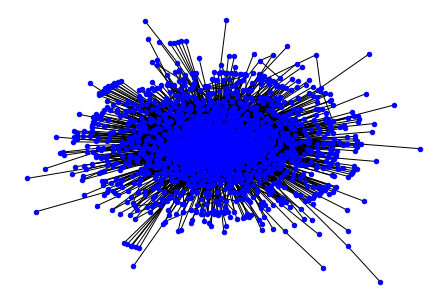

In [66]:
np.random.seed(0)
nx.draw(comunidade_mensagens_1, node_size=20, with_labels=False, node_color="blue")

Número de nós do grafo: 1890
Número de enlaces do grafo: 13832
Densidade do grafo: 0.007748563809971963
Sequência do grau: [35, 5, 5, 20, 1, 16, 1, 10, 49, 30, 1, 160, 8, 56, 104, 18, 17, 177, 89, 7, 13, 72, 178, 22, 11, 6, 13, 43, 15, 1, 1, 14, 66, 31, 29, 207, 1, 227, 66, 1, 22, 21, 28, 15, 23, 53, 106, 34, 1, 40, 117, 6, 17, 16, 146, 77, 7, 46, 28, 55, 46, 60, 2, 63, 4, 69, 11, 121, 77, 38, 10, 23, 66, 71, 5, 8, 183, 40, 1, 55, 22, 9, 41, 45, 1, 5, 16, 227, 61, 6, 6, 28, 20, 23, 34, 2, 14, 34, 10, 3, 21, 8, 66, 6, 44, 88, 27, 110, 36, 41, 38, 22, 33, 25, 3, 2, 14, 93, 56, 67, 6, 12, 86, 10, 15, 21, 15, 17, 172, 23, 2, 18, 29, 35, 11, 5, 1, 117, 35, 36, 23, 20, 12, 6, 6, 13, 49, 9, 21, 15, 63, 5, 23, 99, 36, 48, 10, 13, 15, 20, 156, 91, 4, 6, 51, 15, 30, 39, 44, 3, 1, 15, 2, 1, 4, 10, 6, 18, 13, 12, 241, 19, 18, 62, 11, 19, 9, 42, 45, 18, 9, 8, 15, 45, 5, 15, 41, 53, 65, 5, 83, 5, 22, 21, 20, 31, 105, 31, 10, 29, 17, 52, 89, 22, 22, 23, 72, 53, 31, 35, 23, 8, 55, 37, 9, 7, 8, 4, 32, 

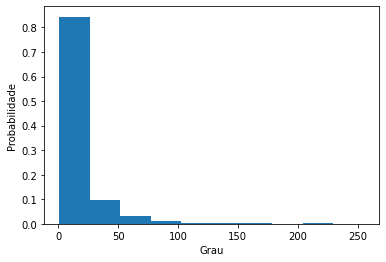

In [67]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_mensagens_1.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_mensagens_1.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_mensagens_1)))

# Sequência do grau
deg_mensagens_1 = [d for n, d in nx.degree(comunidade_mensagens_1)]
print("Sequência do grau: "+ str(deg_mensagens_1))

# Grau médio
lambd_mensagens_1 = np.average(deg_mensagens_1, 0)
print("Grau médio: " + str(lambd_mensagens_1))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_mensagens_1)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_mensagens_1)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_mensagens_1)))

# Histograma
plt.hist(deg_mensagens_1, weights= np.ones_like(deg_mensagens_1) / len(deg_mensagens_1))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Segunda comunidade

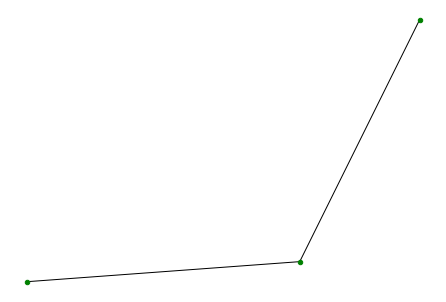

In [68]:
np.random.seed(0)
nx.draw(comunidade_mensagens_2, node_size=20, with_labels=False, node_color="green")

Número de nós do grafo: 3
Número de enlaces do grafo: 2
Densidade do grafo: 0.6666666666666666
Sequência do grau: [1, 2, 1]
Grau médio: 1.3333333333333333
Grau máximo: 2
CC = 0.0
Tamanho médio dos caminhos do grafo: 1.3333333333333333


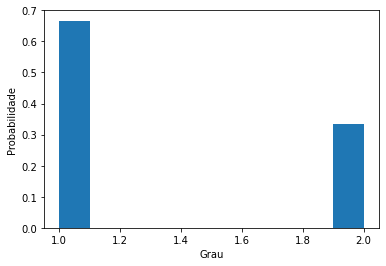

In [69]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_mensagens_2.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_mensagens_2.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_mensagens_2)))

# Sequência do grau
deg_mensagens_2 = [d for n, d in nx.degree(comunidade_mensagens_2)]
print("Sequência do grau: "+ str(deg_mensagens_2))

# Grau médio
lambd_mensagens_2 = np.average(deg_mensagens_2, 0)
print("Grau médio: " + str(lambd_mensagens_2))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_mensagens_2)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_mensagens_2)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_mensagens_2)))

# Histograma
plt.hist(deg_mensagens_2, weights= np.ones_like(deg_mensagens_2) / len(deg_mensagens_2))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

### Greedy modularity

#### Identificando comunidades

In [70]:
mensagens_greedy_comunidades = list(greedy_modularity_communities(maior_componente_mensagens))

In [71]:
grupo_de_nos_mensagens_greedy = []
for c in mensagens_greedy_comunidades:
  grupo_de_nos_mensagens_greedy.append(list(c))

In [72]:
print("O número de comunidades encontradas é: " + str(len(grupo_de_nos_mensagens_greedy)))

O número de comunidades encontradas é: 15


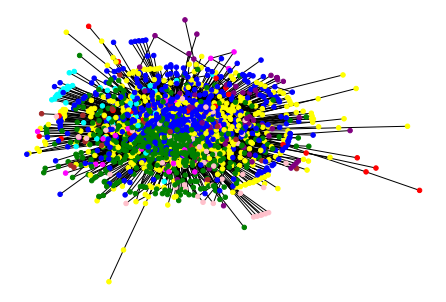

In [73]:
np.random.seed(0)
cores = []
for no in maior_componente_mensagens:
    if no in grupo_de_nos_mensagens_greedy[0]:
      cores.append('blue')
    elif no in grupo_de_nos_mensagens_greedy[1]: 
      cores.append('green')
    elif no in grupo_de_nos_mensagens_greedy[2]:
      cores.append('yellow')
    elif no in grupo_de_nos_mensagens_greedy[3]:
      cores.append('purple')
    elif no in grupo_de_nos_mensagens_greedy[4]:
      cores.append('pink')
    elif no in grupo_de_nos_mensagens_greedy[5]:
      cores.append('cyan')
    elif no in grupo_de_nos_mensagens_greedy[6]:
      cores.append('brown')
    elif no in grupo_de_nos_mensagens_greedy[7]:
      cores.append('magenta')
    else:
      cores.append('red')  
nx.draw(maior_componente_mensagens, node_size = 20, node_color=cores, with_labels=False)
plt.show()

#### Separando comunidades

In [74]:
vizinhos_maior_componente_mensagens_greedy = pegar_vizinhos(maior_componente_mensagens)
lista_de_grafos_mensagens_greedy = criarGrafo(vizinhos_maior_componente_mensagens_greedy, grupo_de_nos_mensagens_greedy)
comunidade_mensagens_greedy_1 = lista_de_grafos_mensagens_greedy[0]
comunidade_mensagens_greedy_2 = lista_de_grafos_mensagens_greedy[1]
comunidade_mensagens_greedy_3 = lista_de_grafos_mensagens_greedy[2]
comunidade_mensagens_greedy_4 = lista_de_grafos_mensagens_greedy[3]
comunidade_mensagens_greedy_5 = lista_de_grafos_mensagens_greedy[4]
comunidade_mensagens_greedy_6 = lista_de_grafos_mensagens_greedy[5]
comunidade_mensagens_greedy_7 = lista_de_grafos_mensagens_greedy[6]
comunidade_mensagens_greedy_8 = lista_de_grafos_mensagens_greedy[7]

##### Primeira comunidade

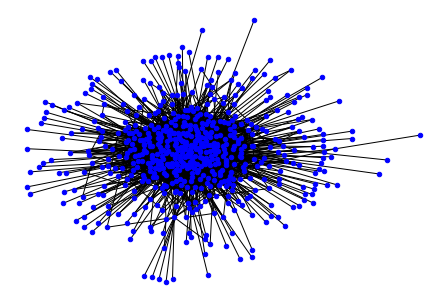

In [75]:
np.random.seed(0)
nx.draw(comunidade_mensagens_greedy_1, node_size=20, with_labels=False, node_color="blue")

Número de nós do grafo: 590
Número de enlaces do grafo: 3361
Densidade do grafo: 0.019343328249546776
Sequência do grau: [30, 3, 40, 15, 15, 19, 11, 14, 20, 15, 12, 44, 32, 22, 5, 23, 31, 27, 13, 17, 34, 21, 12, 2, 24, 8, 59, 17, 8, 30, 24, 35, 41, 2, 7, 10, 119, 3, 24, 49, 11, 15, 113, 5, 97, 73, 13, 68, 5, 28, 34, 23, 11, 39, 26, 9, 23, 22, 25, 56, 19, 2, 25, 3, 26, 7, 6, 14, 28, 19, 51, 44, 30, 45, 10, 9, 14, 21, 47, 2, 3, 1, 12, 31, 26, 39, 33, 5, 36, 15, 28, 15, 17, 64, 7, 5, 28, 6, 13, 14, 8, 9, 9, 10, 4, 3, 21, 3, 52, 16, 28, 37, 27, 4, 12, 32, 71, 6, 1, 27, 21, 4, 8, 31, 74, 23, 5, 21, 58, 11, 61, 22, 9, 11, 27, 14, 13, 7, 2, 25, 1, 1, 9, 28, 3, 12, 46, 40, 9, 36, 37, 31, 22, 13, 17, 14, 44, 22, 3, 14, 28, 13, 30, 6, 10, 12, 27, 38, 26, 11, 3, 2, 4, 8, 14, 23, 11, 19, 1, 5, 10, 5, 13, 10, 2, 15, 18, 6, 6, 2, 12, 15, 2, 3, 1, 11, 15, 10, 6, 17, 21, 39, 15, 3, 7, 10, 3, 8, 14, 1, 20, 1, 1, 1, 8, 1, 28, 4, 1, 20, 2, 9, 5, 1, 15, 13, 17, 14, 33, 20, 7, 59, 31, 27, 18, 8, 28, 8, 15,

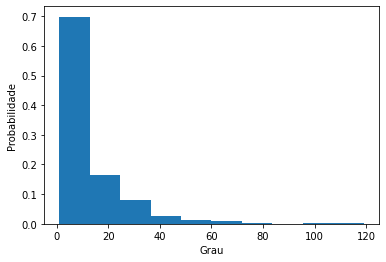

In [76]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_mensagens_greedy_1.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_mensagens_greedy_1.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_mensagens_greedy_1)))

# Sequência do grau
deg_mensagens_greedy_1 = [d for n, d in nx.degree(comunidade_mensagens_greedy_1)]
print("Sequência do grau: "+ str(deg_mensagens_greedy_1))

# Grau médio
lambd_mensagens_greedy_1 = np.average(deg_mensagens_greedy_1, 0)
print("Grau médio: " + str(lambd_mensagens_greedy_1))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_mensagens_greedy_1)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_mensagens_greedy_1)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_mensagens_greedy_1)))

# Histograma
plt.hist(deg_mensagens_greedy_1, weights= np.ones_like(deg_mensagens_greedy_1) / len(deg_mensagens_greedy_1))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Segunda comunidade

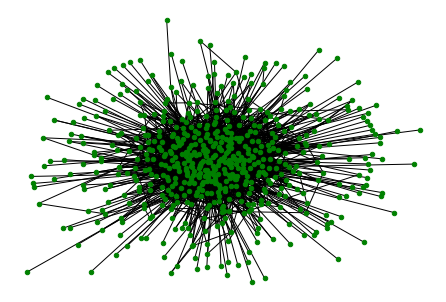

In [77]:
np.random.seed(0)
nx.draw(comunidade_mensagens_greedy_2, node_size=20, with_labels=False, node_color="green")

Número de nós do grafo: 576
Número de enlaces do grafo: 3293
Densidade do grafo: 0.01988526570048309
Sequência do grau: [30, 3, 40, 15, 15, 19, 11, 14, 20, 15, 12, 44, 32, 22, 5, 23, 31, 27, 13, 17, 34, 21, 12, 2, 24, 8, 59, 17, 8, 30, 24, 35, 41, 2, 7, 10, 119, 3, 24, 49, 11, 15, 113, 5, 97, 73, 13, 68, 5, 28, 34, 23, 11, 39, 26, 9, 23, 22, 25, 56, 19, 2, 25, 3, 26, 7, 6, 14, 28, 19, 51, 44, 30, 45, 10, 9, 14, 21, 47, 2, 3, 1, 12, 31, 26, 39, 33, 5, 36, 15, 28, 15, 17, 64, 7, 5, 28, 6, 13, 14, 8, 9, 9, 10, 4, 3, 21, 3, 52, 16, 28, 37, 27, 4, 12, 32, 71, 6, 1, 27, 21, 4, 8, 31, 74, 23, 5, 21, 58, 11, 61, 22, 9, 11, 27, 14, 13, 7, 2, 25, 1, 1, 9, 28, 3, 12, 46, 40, 9, 36, 37, 31, 22, 13, 17, 14, 44, 22, 3, 14, 28, 13, 30, 6, 10, 12, 27, 38, 26, 11, 3, 2, 4, 8, 14, 23, 11, 19, 1, 5, 10, 5, 13, 10, 2, 15, 18, 6, 6, 2, 12, 15, 2, 3, 1, 11, 15, 10, 6, 17, 21, 39, 15, 3, 7, 10, 3, 8, 14, 1, 20, 1, 1, 1, 8, 1, 28, 4, 1, 20, 2, 9, 5, 1, 15, 13, 17, 14, 33, 20, 7, 59, 31, 27, 18, 8, 28, 8, 15, 

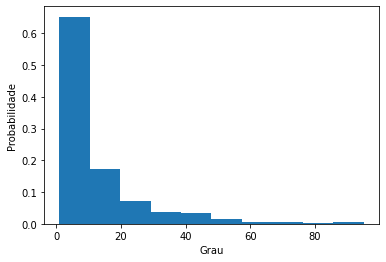

In [78]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_mensagens_greedy_2.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_mensagens_greedy_2.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_mensagens_greedy_2)))

# Sequência do grau
deg_mensagens_greedy_2 = [d for n, d in nx.degree(comunidade_mensagens_greedy_2)]
print("Sequência do grau: "+ str(deg_mensagens_greedy_1))

# Grau médio
lambd_mensagens_greedy_2 = np.average(deg_mensagens_greedy_2, 0)
print("Grau médio: " + str(lambd_mensagens_greedy_2))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_mensagens_greedy_2)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_mensagens_greedy_2)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_mensagens_greedy_2)))

# Histograma
plt.hist(deg_mensagens_greedy_2, weights= np.ones_like(deg_mensagens_greedy_2) / len(deg_mensagens_greedy_2))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Terceira comunidade

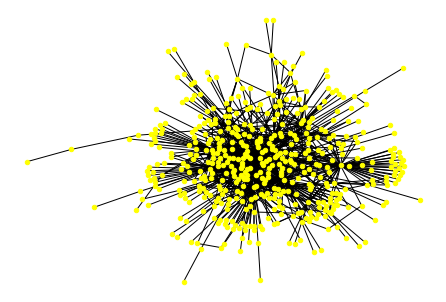

In [79]:
np.random.seed(0)
nx.draw(comunidade_mensagens_greedy_3, node_size=20, with_labels=False, node_color="yellow")

Número de nós do grafo: 475
Número de enlaces do grafo: 1022
Densidade do grafo: 0.009078392182989118
Sequência do grau: [24, 3, 2, 10, 1, 9, 1, 3, 20, 14, 1, 4, 10, 10, 65, 4, 9, 25, 12, 5, 3, 8, 1, 1, 13, 1, 95, 91, 2, 3, 3, 3, 1, 1, 2, 1, 3, 1, 1, 4, 12, 4, 7, 14, 2, 1, 6, 1, 3, 4, 5, 3, 8, 5, 5, 2, 4, 6, 1, 5, 1, 12, 12, 18, 2, 3, 11, 4, 5, 5, 7, 9, 7, 9, 11, 4, 6, 6, 8, 14, 1, 2, 6, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 1, 5, 2, 1, 1, 2, 3, 2, 3, 3, 5, 1, 1, 2, 4, 1, 2, 2, 1, 48, 5, 1, 74, 2, 52, 3, 1, 4, 5, 5, 2, 5, 3, 5, 2, 3, 2, 3, 2, 5, 3, 3, 3, 3, 3, 3, 2, 2, 1, 7, 1, 2, 1, 4, 1, 6, 1, 2, 1, 2, 1, 2, 1, 3, 2, 83, 1, 2, 4, 7, 7, 3, 11, 4, 28, 3, 3, 1, 1, 11, 1, 4, 1, 3, 15, 7, 6, 6, 2, 2, 16, 5, 4, 3, 13, 23, 34, 3, 4, 1, 6, 3, 3, 2, 3, 5, 1, 1, 2, 1, 3, 4, 2, 2, 4, 3, 4, 5, 2, 6, 2, 5, 3, 8, 2, 1, 10, 2, 1, 1, 1, 1, 2, 1, 5, 6, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 8, 2, 5, 1, 3, 7, 2, 1, 1, 1, 3, 1, 2, 2, 1, 3, 10, 1, 1, 1, 2, 2, 14, 2, 2, 1, 3, 1, 5, 1, 2, 8, 3, 2, 3, 2, 6, 2, 1, 1, 1, 6, 

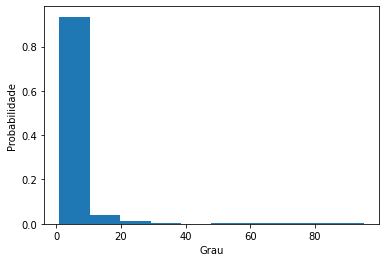

In [80]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_mensagens_greedy_3.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_mensagens_greedy_3.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_mensagens_greedy_3)))

# Sequência do grau
deg_mensagens_greedy_3 = [d for n, d in nx.degree(comunidade_mensagens_greedy_3)]
print("Sequência do grau: "+ str(deg_mensagens_greedy_3))

# Grau médio
lambd_mensagens_greedy_3 = np.average(deg_mensagens_greedy_3, 0)
print("Grau médio: " + str(lambd_mensagens_greedy_3))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_mensagens_greedy_3)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_mensagens_greedy_3)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_mensagens_greedy_3)))

# Histograma
plt.hist(deg_mensagens_greedy_3, weights= np.ones_like(deg_mensagens_greedy_3) / len(deg_mensagens_greedy_3))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Quarta comunidade

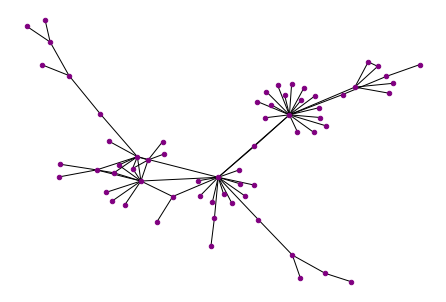

In [81]:
np.random.seed(0)
nx.draw(comunidade_mensagens_greedy_4, node_size=20, with_labels=False, node_color="purple")

Número de nós do grafo: 65
Número de enlaces do grafo: 75
Densidade do grafo: 0.036057692307692304
Sequência do grau: [9, 2, 11, 5, 3, 3, 2, 16, 1, 5, 1, 19, 3, 3, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1]
Grau médio: 2.3076923076923075
Grau máximo: 19
CC = 0.11461599803705065
Tamanho médio dos caminhos do grafo: 3.702403846153846


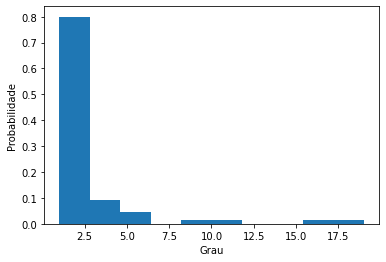

In [82]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_mensagens_greedy_4.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_mensagens_greedy_4.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_mensagens_greedy_4)))

# Sequência do grau
deg_mensagens_greedy_4 = [d for n, d in nx.degree(comunidade_mensagens_greedy_4)]
print("Sequência do grau: "+ str(deg_mensagens_greedy_4))

# Grau médio
lambd_mensagens_greedy_4 = np.average(deg_mensagens_greedy_4, 0)
print("Grau médio: " + str(lambd_mensagens_greedy_4))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_mensagens_greedy_4)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_mensagens_greedy_4)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_mensagens_greedy_4)))

# Histograma
plt.hist(deg_mensagens_greedy_4, weights= np.ones_like(deg_mensagens_greedy_4) / len(deg_mensagens_greedy_4))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Quinta comunidade

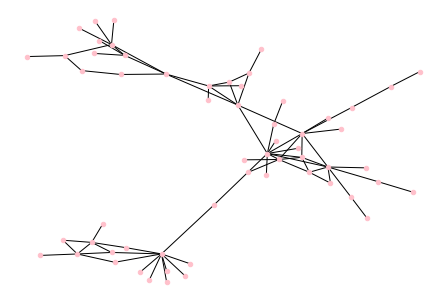

In [83]:
np.random.seed(0)
nx.draw(comunidade_mensagens_greedy_5, node_size=20, with_labels=False, node_color="pink")

Número de nós do grafo: 59
Número de enlaces do grafo: 76
Densidade do grafo: 0.04441846873173583
Sequência do grau: [2, 1, 2, 8, 10, 1, 1, 8, 6, 5, 6, 5, 2, 6, 5, 4, 1, 2, 5, 5, 2, 1, 1, 10, 2, 2, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 4, 2, 1, 3, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
Grau médio: 2.5762711864406778
Grau máximo: 10
CC = 0.11230831315577079
Tamanho médio dos caminhos do grafo: 4.458796025715956


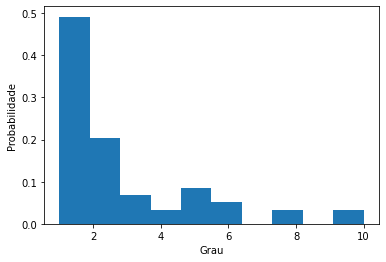

In [84]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_mensagens_greedy_5.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_mensagens_greedy_5.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_mensagens_greedy_5)))

# Sequência do grau
deg_mensagens_greedy_5 = [d for n, d in nx.degree(comunidade_mensagens_greedy_5)]
print("Sequência do grau: "+ str(deg_mensagens_greedy_5))

# Grau médio
lambd_mensagens_greedy_5 = np.average(deg_mensagens_greedy_5, 0)
print("Grau médio: " + str(lambd_mensagens_greedy_5))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_mensagens_greedy_5)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_mensagens_greedy_5)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_mensagens_greedy_5)))

# Histograma
plt.hist(deg_mensagens_greedy_5, weights= np.ones_like(deg_mensagens_greedy_5) / len(deg_mensagens_greedy_5))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Sexta comunidade

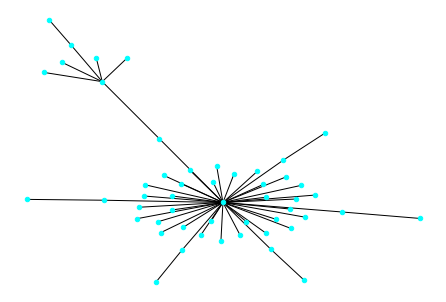

In [85]:
np.random.seed(0)
nx.draw(comunidade_mensagens_greedy_6, node_size=20, with_labels=False, node_color="cyan")

Número de nós do grafo: 51
Número de enlaces do grafo: 50
Densidade do grafo: 0.0392156862745098
Sequência do grau: [2, 6, 1, 1, 38, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Grau médio: 1.9607843137254901
Grau máximo: 38
CC = 0.0
Tamanho médio dos caminhos do grafo: 2.619607843137255


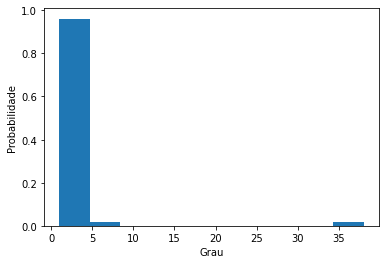

In [86]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_mensagens_greedy_6.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_mensagens_greedy_6.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_mensagens_greedy_6)))

# Sequência do grau
deg_mensagens_greedy_6 = [d for n, d in nx.degree(comunidade_mensagens_greedy_6)]
print("Sequência do grau: "+ str(deg_mensagens_greedy_6))

# Grau médio
lambd_mensagens_greedy_6 = np.average(deg_mensagens_greedy_6, 0)
print("Grau médio: " + str(lambd_mensagens_greedy_6))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_mensagens_greedy_6)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_mensagens_greedy_6)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_mensagens_greedy_6)))

# Histograma
plt.hist(deg_mensagens_greedy_6, weights= np.ones_like(deg_mensagens_greedy_6) / len(deg_mensagens_greedy_6))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Sétima comunidade

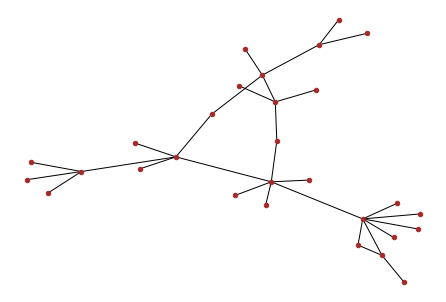

In [87]:
np.random.seed(0)
nx.draw(comunidade_mensagens_greedy_7, node_size=20, with_labels=False, node_color="brown")

Número de nós do grafo: 29
Número de enlaces do grafo: 30
Densidade do grafo: 0.07389162561576355
Sequência do grau: [1, 4, 1, 4, 3, 1, 1, 6, 2, 7, 1, 1, 1, 5, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1]
Grau médio: 2.0689655172413794
Grau máximo: 7
CC = 0.047619047619047616
Tamanho médio dos caminhos do grafo: 3.689655172413793


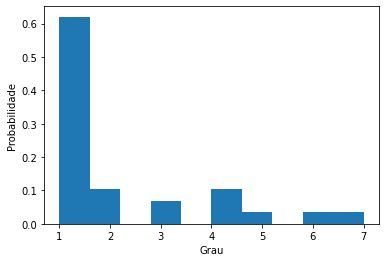

In [88]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_mensagens_greedy_7.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_mensagens_greedy_7.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_mensagens_greedy_7)))

# Sequência do grau
deg_mensagens_greedy_7 = [d for n, d in nx.degree(comunidade_mensagens_greedy_7)]
print("Sequência do grau: "+ str(deg_mensagens_greedy_7))

# Grau médio
lambd_mensagens_greedy_7 = np.average(deg_mensagens_greedy_7, 0)
print("Grau médio: " + str(lambd_mensagens_greedy_7))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_mensagens_greedy_7)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_mensagens_greedy_7)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_mensagens_greedy_7)))

# Histograma
plt.hist(deg_mensagens_greedy_7, weights= np.ones_like(deg_mensagens_greedy_7) / len(deg_mensagens_greedy_7))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()

##### Oitava comunidade

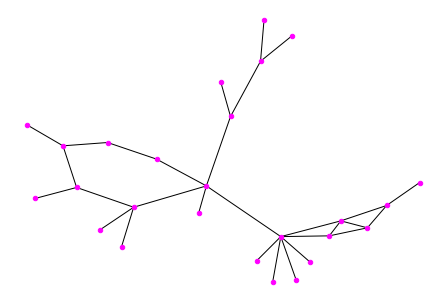

In [89]:
np.random.seed(0)
nx.draw(comunidade_mensagens_greedy_8, node_size=20, with_labels=False, node_color="magenta")

Número de nós do grafo: 26
Número de enlaces do grafo: 29
Densidade do grafo: 0.08923076923076922
Sequência do grau: [4, 3, 3, 7, 3, 3, 2, 3, 1, 1, 3, 1, 1, 4, 2, 5, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1]
Grau médio: 2.230769230769231
Grau máximo: 7
CC = 0.08516483516483515
Tamanho médio dos caminhos do grafo: 3.5815384615384613


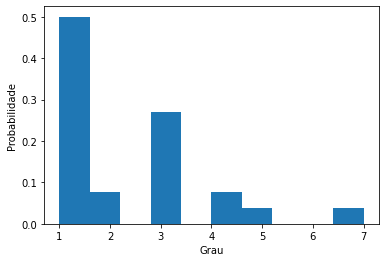

In [90]:
# Número de nós do grafo
print("Número de nós do grafo: " + str(comunidade_mensagens_greedy_8.number_of_nodes()))

# Número de enlaces do grafo
print("Número de enlaces do grafo: " + str(comunidade_mensagens_greedy_8.number_of_edges()))

# Densidade do grafo
print("Densidade do grafo: " + str(nx.density(comunidade_mensagens_greedy_8)))

# Sequência do grau
deg_mensagens_greedy_8 = [d for n, d in nx.degree(comunidade_mensagens_greedy_8)]
print("Sequência do grau: "+ str(deg_mensagens_greedy_8))

# Grau médio
lambd_mensagens_greedy_8 = np.average(deg_mensagens_greedy_8, 0)
print("Grau médio: " + str(lambd_mensagens_greedy_8))

# Grau máximo
print("Grau máximo: " + str(np.max(deg_mensagens_greedy_8)))

# Coeficiente de aglomeração do grafo:
print("CC = " + str(nx.average_clustering(comunidade_mensagens_greedy_8)))

# Tamanho médio dos caminhos do grafo
print("Tamanho médio dos caminhos do grafo: " + str(nx.average_shortest_path_length(comunidade_mensagens_greedy_8)))

# Histograma
plt.hist(deg_mensagens_greedy_8, weights= np.ones_like(deg_mensagens_greedy_8) / len(deg_mensagens_greedy_8))
plt.xlabel('Grau')
plt.ylabel('Probabilidade')
plt.show()